In [75]:
import mfd as mfd
from random import choices, seed

In [ ]:
bvalue, avalue, Mmin, Mmax =1.0, 5.0, 5.0, 9.01
mags = mfd.test_sample_GRdistr(bvalue, avalue, Mmin, Mmax, nevents=10000, rseed=2222, doplot=True);

In [ ]:
import numpy as np

In [ ]:
np.random.normal(scale=0.05, size=1)[0]

In [73]:
def sample_GRdistr(bvalue, avalue, Mmin, Mmax, \
                   nevents = 1000, mbin=0.1, \
                   rseed=None):
    
    mags = np.arange(Mmin, Mmax+mbin, mbin)
    
    N = [10**(avalue-bvalue*mw) for mw in mags]
    # weights- is this necessary
    probs = [n/sum(N) for n in N]
    seed(rseed)
    sample_mag = choices(mags, probs, k=nevents)
    return sample_mag


In [96]:
bvalue, avalue, Mmin, Mmax =1.0, 5.0, 5.0, 9.01
mags = sample_GRdistr(bvalue, avalue, Mmin, Mmax, \
                   nevents = 10000, mbin=0.001, \
                   rseed=12121);

In [97]:
b = mfd.calc_bvalue(mAGS)
print(b)

0.9312290147097071


[5.431000000000144, 5.222000000000074, 5.09000000000003, 5.766000000000256, 5.158000000000053, 5.528000000000176, 5.114000000000038, 5.323000000000108, 5.022000000000007, 5.454000000000152, 5.50900000000017, 5.116000000000039, 5.154000000000051, 5.036000000000012, 5.099000000000033, 5.512000000000171, 5.912000000000305, 5.42000000000014, 5.492000000000164, 6.356000000000453, 5.05900000000002, 5.139000000000046, 5.040000000000013, 5.138000000000046, 5.429000000000143, 5.375000000000125, 5.2530000000000845, 5.489000000000163, 5.135000000000045, 5.158000000000053, 5.26900000000009, 5.095000000000032, 5.3100000000001035, 5.012000000000004, 5.532000000000178, 5.8460000000002825, 5.921000000000308, 5.212000000000071, 5.2590000000000865, 5.513000000000171, 5.584000000000195, 5.182000000000061, 5.474000000000158, 5.559000000000187, 5.80900000000027, 5.21000000000007, 5.902000000000301, 5.11900000000004, 5.557000000000186, 6.037000000000346, 5.77800000000026, 5.553000000000185, 5.16300000000005

(array([620., 216.,  90.,  52.,  10.,   9.,   1.,   1.,   0.,   1.]),
 array([5.   , 5.386, 5.772, 6.158, 6.544, 6.93 , 7.316, 7.702, 8.088,
        8.474, 8.86 ]),
 <a list of 10 Patch objects>)

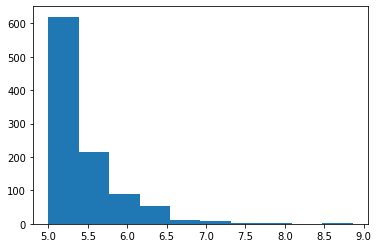

In [95]:
print(mags)
plt.hist(mags)

/home/kirant/openquake/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
/home/kirant/openquake/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1837: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
/home/kirant/openquake/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1837: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


4.9976970942377275

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
mags = np.random.exponential(scale= 0.5/np.log(10), size=100000)


In [69]:
b = mfd.calc_bvalue(mags)

In [70]:
b

1.6221841538668103

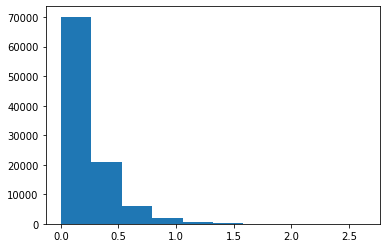

In [71]:
plt.hist(mags);

In [37]:
b*np.log(10)

0.944078420504226